In [71]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [72]:
car_df = pd.read_csv("/content/car-dataset.csv", sep=";")
car_df

,CarName,fueltype,aspiration,carbody,enginesize,horsepower,peakrpm,Car price
0,alfa-romero giulia,gas,std,convertible,130,111,5000,13495
1,alfa-romero stelvio,gas,std,convertible,130,111,5000,16500
2,alfa-romero Quadrifoglio,gas,std,hatchback,152,154,5000,16500
3,audi 100 ls,gas,std,sedan,109,102,5500,13950
4,audi 100ls,gas,std,sedan,136,115,5500,17450
5,audi fox,gas,std,sedan,136,110,5500,15250
6,audi 100ls,gas,std,sedan,136,110,5500,17710
7,audi 5000,gas,std,wagon,136,110,5500,18920
8,audi 4000,gas,turbo,sedan,131,140,5500,23875
9,audi 5000s (diesel),gas,turbo,hatchback,131,160,5500,17859167


In [73]:
pip install sweetviz

In [74]:
import sweetviz as sv

my_report = sv.analyze(car_df)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [75]:
car_df.dtypes

CarName       object
fueltype      object
aspiration    object
carbody       object
enginesize     int64
horsepower     int64
peakrpm        int64
Car price      int64
dtype: object

In [76]:
X = car_df.iloc[:, :-1].values
y = car_df.iloc[:, 7].values

In [77]:
# Verificando se existe algum missing value no dataframe
car_df.isnull().sum()

CarName       0
fueltype      0
aspiration    0
carbody       0
enginesize    0
horsepower    0
peakrpm       0
Car price     0
dtype: int64

In [78]:
car_df.isna().sum()

CarName       0
fueltype      0
aspiration    0
carbody       0
enginesize    0
horsepower    0
peakrpm       0
Car price     0
dtype: int64

In [79]:
car_df.isnull().sum().values.sum()

0

*Uma vez que não existem valores faltantes, não há razão para aplicacar a téécnica de missing data*

In [80]:
pd.unique(car_df['fueltype'])

array(['gas'], dtype=object)

*Fuel type só tem um valor então não será considerado para realizar o encoding variable*

In [81]:
pd.unique(car_df['carbody'])

array(['convertible', 'hatchback', 'sedan', 'wagon'], dtype=object)

In [82]:
pd.unique(car_df['aspiration'])

array(['std', 'turbo'], dtype=object)

In [83]:
car_df['aspiration'] = car_df['aspiration'].map(lambda s :1  if s == 'turbo' else 0)
pd.unique(car_df['aspiration'])

array([0, 1])

In [84]:
car_df

,CarName,fueltype,aspiration,carbody,enginesize,horsepower,peakrpm,Car price
0,alfa-romero giulia,gas,0,convertible,130,111,5000,13495
1,alfa-romero stelvio,gas,0,convertible,130,111,5000,16500
2,alfa-romero Quadrifoglio,gas,0,hatchback,152,154,5000,16500
3,audi 100 ls,gas,0,sedan,109,102,5500,13950
4,audi 100ls,gas,0,sedan,136,115,5500,17450
5,audi fox,gas,0,sedan,136,110,5500,15250
6,audi 100ls,gas,0,sedan,136,110,5500,17710
7,audi 5000,gas,0,wagon,136,110,5500,18920
8,audi 4000,gas,1,sedan,131,140,5500,23875
9,audi 5000s (diesel),gas,1,hatchback,131,160,5500,17859167


In [85]:
car_df.drop(["fueltype"], axis=1, inplace=True) 
car_df.head(10)

,CarName,aspiration,carbody,enginesize,horsepower,peakrpm,Car price
0,alfa-romero giulia,0,convertible,130,111,5000,13495
1,alfa-romero stelvio,0,convertible,130,111,5000,16500
2,alfa-romero Quadrifoglio,0,hatchback,152,154,5000,16500
3,audi 100 ls,0,sedan,109,102,5500,13950
4,audi 100ls,0,sedan,136,115,5500,17450
5,audi fox,0,sedan,136,110,5500,15250
6,audi 100ls,0,sedan,136,110,5500,17710
7,audi 5000,0,wagon,136,110,5500,18920
8,audi 4000,1,sedan,131,140,5500,23875
9,audi 5000s (diesel),1,hatchback,131,160,5500,17859167


In [86]:
dummy_car_df = pd.get_dummies(car_df['carbody'])
dummy_car_df

,convertible,hatchback,sedan,wagon
0,1,0,0,0
1,1,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0
5,0,0,1,0
6,0,0,1,0
7,0,0,0,1
8,0,0,1,0
9,0,1,0,0


In [87]:
car_df_new = pd.concat([car_df,dummy_car_df], axis=1)
car_df_new.head(5)

,CarName,aspiration,carbody,enginesize,horsepower,peakrpm,Car price,convertible,hatchback,sedan,wagon
0,alfa-romero giulia,0,convertible,130,111,5000,13495,1,0,0,0
1,alfa-romero stelvio,0,convertible,130,111,5000,16500,1,0,0,0
2,alfa-romero Quadrifoglio,0,hatchback,152,154,5000,16500,0,1,0,0
3,audi 100 ls,0,sedan,109,102,5500,13950,0,0,1,0
4,audi 100ls,0,sedan,136,115,5500,17450,0,0,1,0


In [88]:
# sliping the car model 
new_car_model = car_df_new["CarName"].str.split(" ", n = 1, expand = True)
new_car_model

,0,1
0,alfa-romero,giulia
1,alfa-romero,stelvio
2,alfa-romero,Quadrifoglio
3,audi,100 ls
4,audi,100ls
5,audi,fox
6,audi,100ls
7,audi,5000
8,audi,4000
9,audi,5000s (diesel)


In [89]:
# Criando a Nova Coluna "First Name" com o new[0]
car_df_new["CarBrand"]= new_car_model[0]
car_df_new.head(5)

,CarName,aspiration,carbody,enginesize,horsepower,peakrpm,Car price,convertible,hatchback,sedan,wagon,CarBrand
0,alfa-romero giulia,0,convertible,130,111,5000,13495,1,0,0,0,alfa-romero
1,alfa-romero stelvio,0,convertible,130,111,5000,16500,1,0,0,0,alfa-romero
2,alfa-romero Quadrifoglio,0,hatchback,152,154,5000,16500,0,1,0,0,alfa-romero
3,audi 100 ls,0,sedan,109,102,5500,13950,0,0,1,0,audi
4,audi 100ls,0,sedan,136,115,5500,17450,0,0,1,0,audi


In [90]:
dummy_car_brand = pd.get_dummies(car_df_new['CarBrand'])
dummy_car_brand

,alfa-romero,audi,bmw,chevrolet,dodge
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
5,0,1,0,0,0
6,0,1,0,0,0
7,0,1,0,0,0
8,0,1,0,0,0
9,0,1,0,0,0


In [91]:
car_df_new_final = pd.concat([car_df_new,dummy_car_brand], axis=1)
car_df_new_final.head(5)

,CarName,aspiration,carbody,enginesize,horsepower,peakrpm,Car price,convertible,hatchback,sedan,wagon,CarBrand,alfa-romero,audi,bmw,chevrolet,dodge
0,alfa-romero giulia,0,convertible,130,111,5000,13495,1,0,0,0,alfa-romero,1,0,0,0,0
1,alfa-romero stelvio,0,convertible,130,111,5000,16500,1,0,0,0,alfa-romero,1,0,0,0,0
2,alfa-romero Quadrifoglio,0,hatchback,152,154,5000,16500,0,1,0,0,alfa-romero,1,0,0,0,0
3,audi 100 ls,0,sedan,109,102,5500,13950,0,0,1,0,audi,0,1,0,0,0
4,audi 100ls,0,sedan,136,115,5500,17450,0,0,1,0,audi,0,1,0,0,0


In [92]:
# Retirando a antiga coluna "Name" 
car_df_new_final.drop(columns =["CarBrand", "carbody", "CarName"], inplace = True) 

In [93]:
car_df_new_final

,aspiration,enginesize,horsepower,peakrpm,Car price,convertible,hatchback,sedan,wagon,alfa-romero,audi,bmw,chevrolet,dodge
0,0,130,111,5000,13495,1,0,0,0,1,0,0,0,0
1,0,130,111,5000,16500,1,0,0,0,1,0,0,0,0
2,0,152,154,5000,16500,0,1,0,0,1,0,0,0,0
3,0,109,102,5500,13950,0,0,1,0,0,1,0,0,0
4,0,136,115,5500,17450,0,0,1,0,0,1,0,0,0
5,0,136,110,5500,15250,0,0,1,0,0,1,0,0,0
6,0,136,110,5500,17710,0,0,1,0,0,1,0,0,0
7,0,136,110,5500,18920,0,0,0,1,0,1,0,0,0
8,1,131,140,5500,23875,0,0,1,0,0,1,0,0,0
9,1,131,160,5500,17859167,0,1,0,0,0,1,0,0,0


In [94]:
cols = [col for col in car_df_new_final if col != 'Car price'] + ['Car price']
df_car_arrumado = car_df_new_final[cols]
df_car_arrumado

,aspiration,enginesize,horsepower,peakrpm,convertible,hatchback,sedan,wagon,alfa-romero,audi,bmw,chevrolet,dodge,Car price
0,0,130,111,5000,1,0,0,0,1,0,0,0,0,13495
1,0,130,111,5000,1,0,0,0,1,0,0,0,0,16500
2,0,152,154,5000,0,1,0,0,1,0,0,0,0,16500
3,0,109,102,5500,0,0,1,0,0,1,0,0,0,13950
4,0,136,115,5500,0,0,1,0,0,1,0,0,0,17450
5,0,136,110,5500,0,0,1,0,0,1,0,0,0,15250
6,0,136,110,5500,0,0,1,0,0,1,0,0,0,17710
7,0,136,110,5500,0,0,0,1,0,1,0,0,0,18920
8,1,131,140,5500,0,0,1,0,0,1,0,0,0,23875
9,1,131,160,5500,0,1,0,0,0,1,0,0,0,17859167


In [95]:
df_car_arrumado = df_car_arrumado.drop([9], axis=0)
df_car_arrumado

,aspiration,enginesize,horsepower,peakrpm,convertible,hatchback,sedan,wagon,alfa-romero,audi,bmw,chevrolet,dodge,Car price
0,0,130,111,5000,1,0,0,0,1,0,0,0,0,13495
1,0,130,111,5000,1,0,0,0,1,0,0,0,0,16500
2,0,152,154,5000,0,1,0,0,1,0,0,0,0,16500
3,0,109,102,5500,0,0,1,0,0,1,0,0,0,13950
4,0,136,115,5500,0,0,1,0,0,1,0,0,0,17450
5,0,136,110,5500,0,0,1,0,0,1,0,0,0,15250
6,0,136,110,5500,0,0,1,0,0,1,0,0,0,17710
7,0,136,110,5500,0,0,0,1,0,1,0,0,0,18920
8,1,131,140,5500,0,0,1,0,0,1,0,0,0,23875
10,0,108,101,5800,0,0,1,0,0,0,1,0,0,16430


In [96]:
df_car_arrumado = df_car_arrumado.drop(["dodge", "wagon"], axis=1)
df_car_arrumado

,aspiration,enginesize,horsepower,peakrpm,convertible,hatchback,sedan,alfa-romero,audi,bmw,chevrolet,Car price
0,0,130,111,5000,1,0,0,1,0,0,0,13495
1,0,130,111,5000,1,0,0,1,0,0,0,16500
2,0,152,154,5000,0,1,0,1,0,0,0,16500
3,0,109,102,5500,0,0,1,0,1,0,0,13950
4,0,136,115,5500,0,0,1,0,1,0,0,17450
5,0,136,110,5500,0,0,1,0,1,0,0,15250
6,0,136,110,5500,0,0,1,0,1,0,0,17710
7,0,136,110,5500,0,0,0,0,1,0,0,18920
8,1,131,140,5500,0,0,1,0,1,0,0,23875
10,0,108,101,5800,0,0,1,0,0,1,0,16430


In [97]:
 car_df_new_final.drop(columns =["CarBrand", "carbody", "CarName"], inplace = True)

KeyError: ignored

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_car_arrumado_fitScale = pd.DataFrame(scaler.fit_transform(df_car_arrumado))
df_car_arrumado_fitScale

In [98]:
X = df_car_arrumado_fitScale.iloc[:, :-1].values
y = df_car_arrumado_fitScale.iloc[:, 11].values

In [99]:
X

array([[-0.2236068 , -0.15866049, -0.13116875, -0.51726934,  3.082207  ,
        -0.48507125, -1.41421356,  2.44948974, -0.63245553, -0.78446454,
        -0.40824829],
       [-0.2236068 , -0.15866049, -0.13116875, -0.51726934,  3.082207  ,
        -0.48507125, -1.41421356,  2.44948974, -0.63245553, -0.78446454,
        -0.40824829],
       [-0.2236068 ,  0.39665123,  1.06524925, -0.51726934, -0.32444284,
         2.06155281, -1.41421356,  2.44948974, -0.63245553, -0.78446454,
        -0.40824829],
       [-0.2236068 , -0.68873078, -0.38158182,  0.57996865, -0.32444284,
        -0.48507125,  0.70710678, -0.40824829,  1.58113883, -0.78446454,
        -0.40824829],
       [-0.2236068 , -0.00721184, -0.01987405,  0.57996865, -0.32444284,
        -0.48507125,  0.70710678, -0.40824829,  1.58113883, -0.78446454,
        -0.40824829],
       [-0.2236068 , -0.00721184, -0.15899242,  0.57996865, -0.32444284,
        -0.48507125,  0.70710678, -0.40824829,  1.58113883, -0.78446454,
        -0.408

In [100]:
y

array([-0.5292588 , -0.20436068, -0.20436068, -0.48006457, -0.10164747,
       -0.33950965, -0.07353648,  0.05728772,  0.59301822, -0.21192902,
       -0.15841003,  0.27893202,  0.29352811,  0.66762045,  1.33741873,
        2.4786166 ,  1.99910807, -1.43140518, -1.30771684, -1.27744348,
       -1.38588701])

In [101]:
X= np.append(arr = np.ones((21,1)).astype(int), values = X, axis =1)
X_opt = X[:,[0,1,2,3,4,5,6,7,8,9,10,11]]
X_opt = np.array(X_opt, dtype=float)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     17.66
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           9.09e-05
Time:                        22:00:55   Log-Likelihood:                 2.9310
No. Observations:                  21   AIC:                             18.14
Df Residuals:                       9   BIC:                             30.67
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.694e-16      0.070  -2.41e-15      1.000      -0.159       0.159
x1            -0.0252      0.164     -0.153      0.882      -0.397       0.347
x2            -0.2028      0.788     -0.257      0.803      -1.985       1.579
x3             1.1325      0.839      1.350      0.210      -0.765       3.030
x4            -0.0794      0.208     -0.382      0.711      -0.550       0.391
x5             0.2692      0.225      1.196      0.262      -0.240       0.778
x6            -0.0639      0.226     -0.282      0.784      -0.576       0.448
x7            -0.1494      0.178     -0.838      0.423      -0.552       0.254
x8            -0.4542      0.389     -1.168      0.273      -1.334       0.426
x9             0.0869      0.274      0.317      0.759      -0.534       0.708
x10            0.2237      0.336      0.666      0.522      -0.537       0.984
x11            0.0637      0.153      0.416      0.687      -0.283       0.410
==============================================================================
Omnibus:                        5.615   Durbin-Watson:                   3.043
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                4.997
Skew:                          -0.066   Prob(JB):                       0.0822
Kurtosis:                       5.386   Cond. No.                         34.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
X_opt = X[:,[0,2,3,4,5,6,7,8,9,10,11]]
X_opt = np.array(X_opt, dtype=float)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     21.52
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           1.87e-05
Time:                        22:01:41   Log-Likelihood:                 2.9036
No. Observations:                  21   AIC:                             16.19
Df Residuals:                      10   BIC:                             27.68
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.694e-16      0.067  -2.54e-15      1.000      -0.148       0.148
x1            -0.0972      0.362     -0.268      0.794      -0.904       0.710
x2             1.0188      0.371      2.746      0.021       0.192       1.845
x3            -0.0534      0.114     -0.469      0.649      -0.307       0.200
x4             0.2532      0.189      1.337      0.211      -0.169       0.675
x5            -0.0549      0.208     -0.265      0.797      -0.517       0.407
x6            -0.1444      0.166     -0.868      0.406      -0.515       0.226
x7            -0.4069      0.224     -1.816      0.099      -0.906       0.092
x8             0.1019      0.243      0.419      0.684      -0.441       0.644
x9             0.2511      0.270      0.929      0.375      -0.351       0.854
x10            0.0723      0.136      0.533      0.605      -0.230       0.374
==============================================================================
Omnibus:                        5.525   Durbin-Watson:                   3.034
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                4.855
Skew:                          -0.019   Prob(JB):                       0.0883
Kurtosis:                       5.355   Cond. No.                         16.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
X_opt = X[:,[0,2,3,4,5,7,8,9,10,11]]
X_opt = np.array(X_opt, dtype=float)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     26.11
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           3.58e-06
Time:                        22:02:45   Log-Likelihood:                 2.8304
No. Observations:                  21   AIC:                             14.34
Df Residuals:                      11   BIC:                             24.78
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.694e-16      0.064  -2.66e-15      1.000      -0.140       0.140
x1            -0.0675      0.329     -0.205      0.841      -0.793       0.658
x2             0.9904      0.340      2.915      0.014       0.242       1.738
x3            -0.0456      0.105     -0.433      0.673      -0.277       0.186
x4             0.2891      0.126      2.289      0.043       0.011       0.567
x5            -0.1138      0.114     -0.996      0.341      -0.365       0.138
x6            -0.3963      0.211     -1.879      0.087      -0.861       0.068
x7             0.1434      0.178      0.805      0.438      -0.249       0.536
x8             0.2902      0.217      1.339      0.208      -0.187       0.767
x9             0.0833      0.123      0.674      0.514      -0.189       0.355
==============================================================================
Omnibus:                        5.427   Durbin-Watson:                   3.049
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                4.635
Skew:                          -0.085   Prob(JB):                       0.0985
Kurtosis:                       5.295   Cond. No.                         14.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
X_opt = X[:,[0,3,4,5,7,8,9,10,11]]
X_opt = np.array(X_opt, dtype=float)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     31.92
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           6.11e-07
Time:                        22:03:21   Log-Likelihood:                 2.7904
No. Observations:                  21   AIC:                             12.42
Df Residuals:                      12   BIC:                             21.82
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.694e-16      0.061  -2.77e-15      1.000      -0.133       0.133
x1             0.9241      0.100      9.243      0.000       0.706       1.142
x2            -0.0300      0.070     -0.430      0.675      -0.182       0.122
x3             0.2769      0.107      2.595      0.023       0.044       0.509
x4            -0.1103      0.108     -1.018      0.329      -0.346       0.126
x5            -0.3718      0.167     -2.231      0.046      -0.735      -0.009
x6             0.1481      0.169      0.874      0.399      -0.221       0.517
x7             0.2937      0.207      1.417      0.182      -0.158       0.745
x8             0.0871      0.117      0.744      0.471      -0.168       0.342
==============================================================================
Omnibus:                        5.422   Durbin-Watson:                   3.058
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                4.577
Skew:                          -0.125   Prob(JB):                        0.101
Kurtosis:                       5.274   Cond. No.                         8.24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
X_opt = X[:,[0,3,5,7,8,9,10,11]]
X_opt = np.array(X_opt, dtype=float)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     38.89
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           1.01e-07
Time:                        22:03:45   Log-Likelihood:                 2.6301
No. Observations:                  21   AIC:                             10.74
Df Residuals:                      13   BIC:                             19.10
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.694e-16      0.059  -2.86e-15      1.000      -0.128       0.128
x1             0.9162      0.095      9.629      0.000       0.711       1.122
x2             0.2741      0.103      2.658      0.020       0.051       0.497
x3            -0.1115      0.105     -1.063      0.307      -0.338       0.115
x4            -0.3537      0.156     -2.265      0.041      -0.691      -0.016
x5             0.1537      0.164      0.940      0.365      -0.200       0.507
x6             0.3163      0.194      1.630      0.127      -0.103       0.736
x7             0.0916      0.113      0.812      0.432      -0.152       0.336
==============================================================================
Omnibus:                        5.425   Durbin-Watson:                   3.128
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                4.503
Skew:                          -0.172   Prob(JB):                        0.105
Kurtosis:                       5.242   Cond. No.                         8.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
X_opt = X[:,[0,3,5,7,8,9,10]]
X_opt = np.array(X_opt, dtype=float)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     46.39
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           1.91e-08
Time:                        22:04:05   Log-Likelihood:                 2.1109
No. Observations:                  21   AIC:                             9.778
Df Residuals:                      14   BIC:                             17.09
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.694e-16      0.058   -2.9e-15      1.000      -0.125       0.125
x1             0.9112      0.094      9.715      0.000       0.710       1.112
x2             0.2723      0.102      2.674      0.018       0.054       0.491
x3            -0.0916      0.101     -0.909      0.378      -0.308       0.124
x4            -0.4143      0.135     -3.059      0.008      -0.705      -0.124
x5             0.0571      0.111      0.515      0.615      -0.181       0.295
x6             0.2106      0.142      1.481      0.161      -0.094       0.516
==============================================================================
Omnibus:                        4.228   Durbin-Watson:                   3.020
Prob(Omnibus):                  0.121   Jarque-Bera (JB):                2.786
Skew:                          -0.041   Prob(JB):                        0.248
Kurtosis:                       4.782   Cond. No.                         5.83
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
X_opt = X[:,[0,3,5,7,8,10]]
X_opt = np.array(X_opt, dtype=float)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     58.48
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           2.65e-09
Time:                        22:04:28   Log-Likelihood:                 1.9140
No. Observations:                  21   AIC:                             8.172
Df Residuals:                      15   BIC:                             14.44
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.694e-16      0.057  -2.97e-15      1.000      -0.122       0.122
x1             0.9351      0.079     11.775      0.000       0.766       1.104
x2             0.2807      0.098      2.864      0.012       0.072       0.490
x3            -0.0675      0.087     -0.776      0.450      -0.253       0.118
x4            -0.4440      0.120     -3.716      0.002      -0.699      -0.189
x5             0.1495      0.076      1.961      0.069      -0.013       0.312
==============================================================================
Omnibus:                        4.701   Durbin-Watson:                   3.008
Prob(Omnibus):                  0.095   Jarque-Bera (JB):                3.135
Skew:                          -0.293   Prob(JB):                        0.209
Kurtosis:                       4.800   Cond. No.                         4.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
X_opt = X[:,[0,3,5,8,10]]
X_opt = np.array(X_opt, dtype=float)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     74.81
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           3.78e-10
Time:                        22:04:48   Log-Likelihood:                 1.5005
No. Observations:                  21   AIC:                             6.999
Df Residuals:                      16   BIC:                             12.22
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.694e-16      0.056  -3.01e-15      1.000      -0.119       0.119
x1             0.9102      0.072     12.694      0.000       0.758       1.062
x2             0.2720      0.096      2.829      0.012       0.068       0.476
x3            -0.3994      0.103     -3.860      0.001      -0.619      -0.180
x4             0.1367      0.073      1.860      0.081      -0.019       0.292
==============================================================================
Omnibus:                        3.279   Durbin-Watson:                   2.817
Prob(Omnibus):                  0.194   Jarque-Bera (JB):                1.657
Skew:                           0.071   Prob(JB):                        0.437
Kurtosis:                       4.369   Cond. No.                         3.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
X_opt = X[:,[0,3,5,8]]
X_opt = np.array(X_opt, dtype=float)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     86.13
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           1.75e-10
Time:                        22:05:08   Log-Likelihood:               -0.55559
No. Observations:                  21   AIC:                             9.111
Df Residuals:                      17   BIC:                             13.29
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.694e-16      0.060  -2.81e-15      1.000      -0.127       0.127
x1             0.9885      0.062     15.927      0.000       0.858       1.119
x2             0.2995      0.102      2.946      0.009       0.085       0.514
x3            -0.4737      0.102     -4.636      0.000      -0.689      -0.258
==============================================================================
Omnibus:                        1.164   Durbin-Watson:                   2.646
Prob(Omnibus):                  0.559   Jarque-Bera (JB):                0.215
Skew:                           0.154   Prob(JB):                        0.898
Kurtosis:                       3.389   Cond. No.                         3.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
X_opt = X[:,[0,3,8]]
X_opt = np.array(X_opt, dtype=float)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     87.51
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           5.33e-10
Time:                        22:05:28   Log-Likelihood:                -4.8875
No. Observations:                  21   AIC:                             15.78
Df Residuals:                      18   BIC:                             18.91
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.694e-16      0.072  -2.35e-15      1.000      -0.151       0.151
x1             0.9493      0.072     13.110      0.000       0.797       1.101
x2            -0.2314      0.072     -3.195      0.005      -0.384      -0.079
==============================================================================
Omnibus:                        0.147   Durbin-Watson:                   2.348
Prob(Omnibus):                  0.929   Jarque-Bera (JB):                0.027
Skew:                           0.024   Prob(JB):                        0.987
Kurtosis:                       2.832   Cond. No.                         1.12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
X_opt = X[:,[0,3]]
X_opt = np.array(X_opt, dtype=float)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     111.0
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           2.26e-09
Time:                        22:05:41   Log-Likelihood:                -9.6049
No. Observations:                  21   AIC:                             23.21
Df Residuals:                      19   BIC:                             25.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.694e-16      0.088  -1.93e-15      1.000      -0.184       0.184
x1             0.9240      0.088     10.536      0.000       0.740       1.108
==============================================================================
Omnibus:                       10.066   Durbin-Watson:                   1.739
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.023
Skew:                          -0.949   Prob(JB):                       0.0110
Kurtosis:                       5.590   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
X = df_car_arrumado_fitScale[[2]]
y= df_car_arrumado_fitScale[11]

In [51]:
X.head()

,2
0,-0.131169
1,-0.131169
2,1.065249
3,-0.381582
4,-0.019874


In [52]:
y.head()

0   -0.529259
1   -0.204361
2   -0.204361
3   -0.480065
4   -0.101647
Name: 11, dtype: float64

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [54]:
X_train.shape

(16, 1)

In [55]:
y_train.shape

(16,)

In [56]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
y_pred = regressor.predict(X_test)

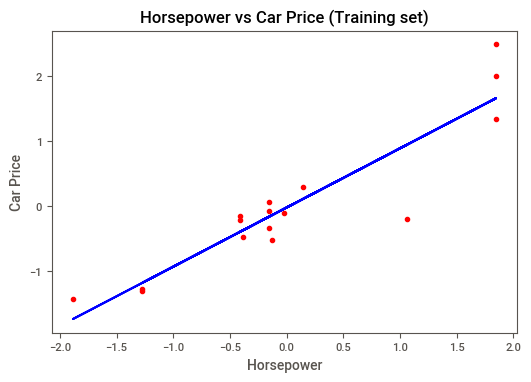

In [58]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Horsepower vs Car Price (Training set)')
plt.xlabel('Horsepower')
plt.ylabel('Car Price')
plt.show()

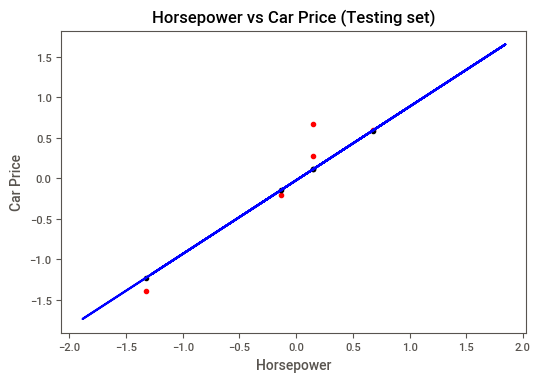

In [59]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.scatter(X_test,y_pred, color = 'black') #plotar a predição
plt.title('Horsepower vs Car Price (Testing set)')
plt.xlabel('Horsepower')
plt.ylabel('Car Price')
plt.show()

In [60]:
regressor.score(X, y)

0.8530090608148596

In [61]:
X2 = df_car_arrumado_fitScale[[1]] 
y2 = df_car_arrumado_fitScale[11] 
X2.head() 
y2.head() 



0   -0.529259
1   -0.204361
2   -0.204361
3   -0.480065
4   -0.101647
Name: 11, dtype: float64

In [62]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.2, random_state = 0)

# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)


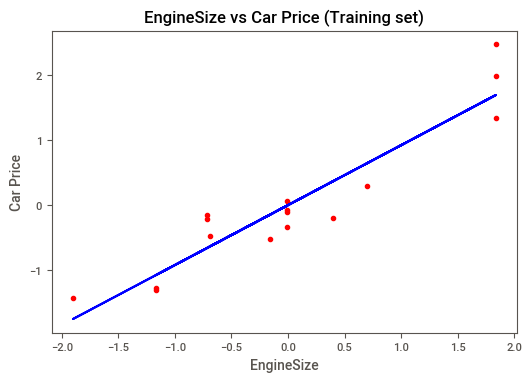

In [63]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('EngineSize vs Car Price (Training set)')
plt.xlabel('EngineSize')
plt.ylabel('Car Price')
plt.show()


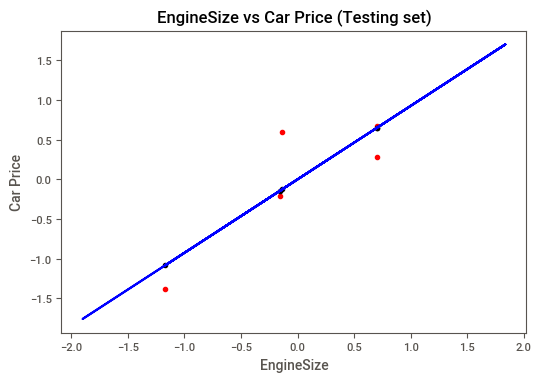

In [64]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.scatter(X_test,y_pred, color = 'black') #plotar a predição
plt.title('EngineSize vs Car Price (Testing set)')
plt.xlabel('EngineSize')
plt.ylabel('Car Price')
plt.show()


In [65]:
regressor.score(X, y)

0.8538497101471682

In [66]:
# Creating an SQLite Database
import sqlite3 as sq3
con = sq3.connect("Cars.db")

In [67]:
# Loading Data from DataSet into an SQLite Database
car_df.to_sql("CarPrice", con, index=False)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2615: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [68]:
# Loading Data from SQLite Database into DataFrame
car_price = pd.read_sql("SELECT * FROM CarPrice", con)
car_price

,CarName,aspiration,carbody,enginesize,horsepower,peakrpm,Car price
0,alfa-romero giulia,0,convertible,130,111,5000,13495
1,alfa-romero stelvio,0,convertible,130,111,5000,16500
2,alfa-romero Quadrifoglio,0,hatchback,152,154,5000,16500
3,audi 100 ls,0,sedan,109,102,5500,13950
4,audi 100ls,0,sedan,136,115,5500,17450
5,audi fox,0,sedan,136,110,5500,15250
6,audi 100ls,0,sedan,136,110,5500,17710
7,audi 5000,0,wagon,136,110,5500,18920
8,audi 4000,1,sedan,131,140,5500,23875
9,audi 5000s (diesel),1,hatchback,131,160,5500,17859167


In [69]:
# Closing connection
con.close()